<a href="https://colab.research.google.com/github/juanbrasdefer/GU_24_ANNs/blob/main/FNN%20%2B%20Backprop%20%2B%20MSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Set 1
# Juan Pablo Brasdefer
## September 2024
## Applied Neural Networks - prof. Ziogas

In [62]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
#
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras import losses
from scipy.stats import norm
from tensorflow.keras import activations
from tensorflow.keras import optimizers
from tensorflow.keras.losses import CategoricalCrossentropy, MeanSquaredError
from tensorflow.data import Dataset

Let's adapt this code to our own neural net

Each output o1 and o2 is real between 0.0 and 1.0
*   Learning rate : 0.2
*   Loss : Mean Squarred Error
*   Optimizer : Simple Gradient Descent
*   Normalization : Sigmoid function (for hidden and output layers)
*   Bias : not updatable



In [63]:
# changing our network to have 3 inputs
input_layer = Input(shape=(3,))

# assigning our input constants to their nodes
inputs = tf.constant([[0.2, 0.35, 0.5]])

In [64]:
# creating a new class with which to set our bias for layers
class SetBias(tf.keras.constraints.Constraint):
  """Constrains bias 1 to be 0.35"""

  def __init__(self, ref_value):
    self.ref_value = ref_value

  def __call__(self, bias):
    bias_cst=tf.fill(bias.shape, self.ref_value)
    return bias_cst

# Some useful functions

In [65]:
def softmax(x):
  return np.exp(x)/np.sum(np.exp(x),axis=0)
def cross_entropy(y,y_pre):
  loss=-np.sum(y*np.log(y_pre))
  return loss/float(y_pre.shape[0])
def logistic(x):
  logistic=1/(1+np.exp(-x))
  return logistic

In [66]:
def softmax(x):
  return np.exp(x)/np.sum(np.exp(x),axis=0)
def cross_entropy(y,y_pre):
  loss=-np.sum(y*np.log(y_pre))
  return loss/float(y_pre.shape[0])
def logistic(x):
  logistic=1/(1+np.exp(-x))
  return logistic

In [67]:
x=np.array([0.1, 0.9, 4.0])
output=softmax(x)
print('Softmax in Python :',output)

Softmax in Python : [0.0190013  0.04228816 0.93871054]


In [68]:
x=np.array([1.105905967, 1.224921404])
output=logistic(x)
print('logistics fn :',output)

logistics fn : [0.75136507 0.77292847]


In [69]:
loss_fn=tf.keras.losses.MeanSquaredError()
y_pred = [[0.751365066, 0.772928476]]
y_true = [[0.01, 0.99]]

#loss = loss_fn( y_true,y_pred)
#loss

#Create Layer1

In [70]:
# initialize weights and biases for our layer input->hidden


# Define the hidden layer
dense_layer1 = layers.Dense(
    units=2,  # hidden layer has 2 neurons
    use_bias=True,  # use bias for hidden layer
    activation=activations.sigmoid,  # ActivationFunction (AF) set to sigmoid
    name='layer1',
    input_shape=(3,) # 3 layers in input layer
)

# Define the weights and biases
W1 = np.array(
    [[0.15, 0.3],  # weights from input 1 to hidden layer (w1, w4)
     [0.20, 0.40],  # weights from input 2 to hidden layer (w2, w5)
     [0.60, 0.10]])  # weights from input 3 to hidden layer (w3, w6)

b1 = np.array([0.85, 0.85])  # bias for the two neurons in our hidden layer

# Set the weights and biases
dense_layer1.build((None, 3))  # Build the layer with input shape
dense_layer1.set_weights([W1, b1])  # Set weights and biases

#Create layer 2



In [71]:
# We set weights and biases according to jp example
setBias2=SetBias(0.6)

W2 = np.array(
    [[0.8, 0.45],  # weights from hidden1 to output layer (w7, w9)
     [0.5, 0.7]])  # wweights from hidden2 to output layer (w8, w10)

b2 = np.array([0.25,0.25])   # bias for the two neurons in our output layer




dense_layer2 = layers.Dense(units=2, # 2 neurons in output
                            use_bias=True, # use bias for hidden layer
                            activation=activations.sigmoid, # ActivationFunction (AF) set to sigmoid
                            name='layer2',
                            input_shape=(2,) # 2 neurons in hidden
                            )


# Set the weights and biases
dense_layer2.build((None, 2))  # Build the layer with input shape
dense_layer2.set_weights([W2, b2])  # Set weights and biases




# Create the jp Model :
# Input => Layer1 => Layer 2

In [72]:
# changing our network to have 3 inputs
layer_inputs = Input(shape=(3,))
out_layer1=dense_layer1(layer_inputs)
out_layer2=dense_layer2(out_layer1)
jp_model=Model(layer_inputs,out_layer2)
jp_model.summary()



Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 3)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer1 (Dense)                       │ (None, 2)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer2 (Dense)                       │ (None, 2)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14 (56.00 B)

 Trainable params: 14 (56.00 B)

 Non-trainable params: 0 (0.00 B)

In [73]:
#test jp model
model_o=jp_model(inputs)
model_o1=model_o[0][0]
model_o2=model_o[0][1]

jp_o1=0.78
jp_o2=0.75
model_diff_o1 = model_o1-jp_o1
model_diff_o2 = model_o2-jp_o2
print('Model out o1= {0:.9f}'.format(model_o1)+ ' Model out o2= {0:.9f}'.format(model_o2))
print('jp  out o1= {0:.9f}'.format(jp_o1)+ ' jp  out o2= {0:.9f}'.format(jp_o2))

Model out o1= 0.776774883 Model out o2= 0.754908800
jp  out o1= 0.780000000 jp  out o2= 0.750000000


# Compile jp Model with loss=MeanSquarredError


*   fit model on 1 input to see
    gradients w1 to w6 on layer1 after 1 backpropagation
*   fit model on a second input ( the same input) to see
    gradients w7 to w10 on layer2 after 2 backpropagation


In [74]:
# Compile the model
jp_model.compile(
    loss=tf.keras.losses.MeanSquaredError(),  # MSE ean Squared Error as loss
    optimizer=optimizers.SGD(learning_rate=0.2),  # new SGD optimizer with alpha = 0.2
    metrics=['accuracy'])  # another metric

#training dataset
x_tr=np.vstack([inputs]*1)
y_true=np.array([0.1, # our targets, o1 and
                 0.9]) # o2
y_tr=np.vstack([y_true]*1)



In [75]:
#Let's train on only one backpropagation
jp_model.fit(x_tr,
             y_tr,
             epochs=1,
             batch_size=1,
             verbose=1,
             validation_split=0.0)
jp_model.summary

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step - accuracy: 0.0000e+00 - loss: 0.2395


<bound method Model.summary of <Functional name=functional_5, built=True>>

Quick Discussion:
It makes me very happy to see the above loss of 0.2395 in the first iteration. This is what I got when I did it manually! I'm not as dumb as I look!

In [76]:
#after 1 training (1 back propagation) Weights at step 1:
jp_model.fit(x_tr,
             y_tr, epochs=1,
             batch_size=1,
             verbose=1,
             validation_split=0.0)
jp_model.weights

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0000e+00 - loss: 0.2331


[<KerasVariable shape=(3, 2), dtype=float32, path=layer1/kernel>,
 <KerasVariable shape=(2,), dtype=float32, path=layer1/bias>,
 <KerasVariable shape=(2, 2), dtype=float32, path=layer2/kernel>,
 <KerasVariable shape=(2,), dtype=float32, path=layer2/bias>]

Run a second backward propagation

In [77]:
#after 2 training of 1 epoch of batch=1 (2 back propagations) Weights at step 2:
jp_model.fit(x_tr,
             y_tr,
             epochs=1,
             batch_size=1,
             verbose=1,
             validation_split=0.0)
jp_model.trainable_weights

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 1.0000 - loss: 0.2266


[<KerasVariable shape=(3, 2), dtype=float32, path=layer1/kernel>,
 <KerasVariable shape=(2,), dtype=float32, path=layer1/bias>,
 <KerasVariable shape=(2, 2), dtype=float32, path=layer2/kernel>,
 <KerasVariable shape=(2,), dtype=float32, path=layer2/bias>]

# Train the model on 1000 epochs
  The output should be close to [0.1, 0.9]



In [78]:
#training dataset
x_tr=np.vstack([inputs]*10)
y_true=np.array([0.1,0.9])
y_tr=np.vstack([y_true]*10)

#Let's train on only one backpropagation
history=jp_model.fit(x_tr,
                     y_tr,
                     epochs=1000,
                     batch_size=1,
                     verbose=1,
                     validation_split=0.0)


Epoch 1/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.2028 
Epoch 2/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.1339 
Epoch 3/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0805 
Epoch 4/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0488 
Epoch 5/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0314 
Epoch 6/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0215 
Epoch 7/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0156 
Epoch 8/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0117  
Epoch 9/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0091 
Epoch 10/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0072 
Epoch 11/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0058 
Epoch 12/1000
10/10 ━━━━━━━━━━━━━━━━━━━━

## Model Error Assessment: MSE

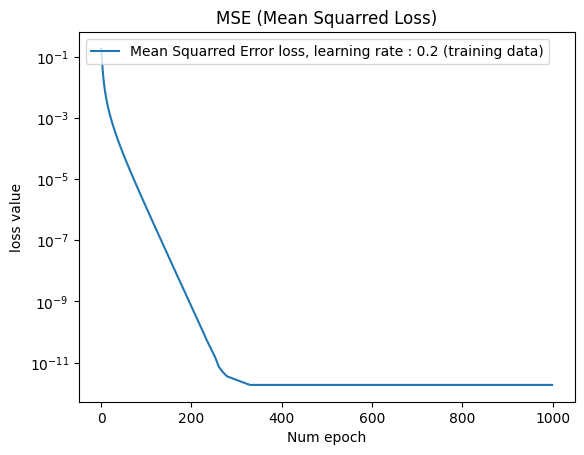

In [85]:
# Visualize training process
plt.plot(history.history['loss'],
         label='Mean Squarred Error loss, learning rate : 0.2 (training data)')
#plt.plot(history.history['accuracy'], label='accuracy (training data)')
plt.title('MSE (Mean Squarred Loss)')
plt.ylabel('loss value')
plt.yscale('log')
plt.xlabel('Num epoch')
plt.legend(loc="upper left")
plt.show()

Curiosity: Weights

In [87]:
jp_model.trainable_weights

# inspect the 6 weights between first 2 layers
# and 4 weights between hidden and output
for var in jp_model.trainable_weights:
    print(f"Variable: {var.name}, Shape: {var.shape}, Values: \n{var.numpy()}\n")

# note that we see no bias!
# since we prevented it from being altered

Variable: kernel, Shape: (3, 2), Values: 
[[0.14943361 0.2997011 ]
 [0.19900881 0.3994769 ]
 [0.59858406 0.09925271]]

Variable: kernel, Shape: (2, 2), Values: 
[[0.7817568  0.4541733 ]
 [0.48239142 0.7040281 ]]



Checking the results here quickly


In [92]:
# let see the results
jp_model(inputs)



<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.7719517, 0.7560345]], dtype=float32)>

# jp Model : See the gradients
 We create a Custom training loop to see/update the gradients during training using GradientTape()





In [89]:
# jps inputs
inputs = tf.constant([[0.2, 0.35, 0.5]])
batch_input=np.vstack([inputs]*3)




# Define the hidden layer
dense_layer1 = layers.Dense(
    units=2,  # hidden layer has 2 neurons
    use_bias=True,  # use bias for hidden layer
    activation=activations.sigmoid,  # ActivationFunction (AF) set to sigmoid
    name='layer1',
    input_shape=(3,) # 3 layers in input layer
)

# Define the weights and biases
W1 = np.array(
    [[0.15, 0.3],  # weights from input 1 to hidden layer (w1, w4)
     [0.20, 0.40],  # weights from input 2 to hidden layer (w2, w5)
     [0.60, 0.10]])  # weights from input 3 to hidden layer (w3, w6)

b1 = np.array([0.85, 0.85])  # bias for the two neurons in our hidden layer

# Set the weights and biases
dense_layer1.build((None, 3))  # Build the layer with input shape
dense_layer1.set_weights([W1, b1])  # Set weights and biases

# We set weights and biases according to jp example
setBias2=SetBias(0.6)

W2 = np.array(
    [[0.8, 0.45],  # weights from hidden1 to output layer (w7, w9)
     [0.5, 0.7]])  # wweights from hidden2 to output layer (w8, w10)

b2 = np.array([0.25,0.25])   # bias for the two neurons in our output layer




dense_layer2 = layers.Dense(units=2, # 2 neurons in output
                            use_bias=True, # use bias for hidden layer
                            activation=activations.sigmoid, # ActivationFunction (AF) set to sigmoid
                            name='layer2',
                            input_shape=(2,) # 2 neurons in hidden
                            )


# Set the weights and biases
dense_layer2.build((None, 2))  # Build the layer with input shape
dense_layer2.set_weights([W2, b2])  # Set weights and biases




# changing our network to have 3 inputs
layer_inputs = Input(shape=(3,))
out_layer1=dense_layer1(layer_inputs)
out_layer2=dense_layer2(out_layer1)
jp_model=Model(layer_inputs,out_layer2)




# Set biases to be non-trainable
for layer in jp_model.layers:
    if hasattr(layer, 'bias'):
        layer.bias.trainable = False  # Make biases non-trainable

# Compile the model
jp_model.compile(
    loss=tf.keras.losses.MeanSquaredError(),  # MSE ean Squared Error as loss
    optimizer=optimizers.SGD(learning_rate=0.2),  # new SGD optimizer with alpha = 0.2
    metrics=['accuracy'])  # another metric


In [90]:

# once again initializing our input vals
x_tr = tf.constant([[0.2, 0.35, 0.5]])
y_tr = tf.constant([[0.1, 0.9]]) # and targets

# bring in data again
xdataset = tf.data.Dataset.from_tensor_slices([x_tr])
ydataset = tf.data.Dataset.from_tensor_slices([y_tr])
tr_dataset = tf.data.Dataset.zip(xdataset, ydataset)


loss_fn=tf.keras.losses.MeanSquaredError() # setting MSE
optimizer_leg = optimizers.SGD(learning_rate=0.2) # learning rate

# prof Ziogas gradient loop
for (x, y_true) in tr_dataset:
    # Open a GradientTape.
    with tf.GradientTape() as tape:
        # Forward pass.
        y_pred = jp_model(x)
        # Loss value for this batch of 1 input
        loss = loss_fn( y_true,y_pred)

    # Get gradients of the loss wrt the weights.
    gradients = tape.gradient(loss, jp_model.trainable_weights)
    trainable_weights=jp_model.trainable_weights
    #Update the weights of our linear layer.
    optimizer_leg.apply_gradients(zip(gradients, jp_model.trainable_weights))

    # Logging.
    print( f'gradients {gradients}, \n      Loss : {float(loss)}')



gradients [<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[0.00283198, 0.00149459],
       [0.00495597, 0.00261553],
       [0.00707995, 0.00373648]], dtype=float32)>, <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 0.091216  , -0.0208666 ],
       [ 0.08804289, -0.02014072]], dtype=float32)>], 
      Loss : 0.2395378202199936


In [91]:
# inspect weights again
jp_model.trainable_weights

for var in jp_model.trainable_weights:
    print(f"Variable: {var.name}, Shape: {var.shape}, Values: \n{var.numpy()}\n")

Variable: kernel, Shape: (3, 2), Values: 
[[0.14943361 0.2997011 ]
 [0.19900881 0.3994769 ]
 [0.59858406 0.09925271]]

Variable: kernel, Shape: (2, 2), Values: 
[[0.7817568  0.4541733 ]
 [0.48239142 0.7040281 ]]



## Discussion

I think the most interesting part of this process was doing it myself first. Or, at least doing one full feed-forward, one full backpropagation, and one full weight-update.
It took so long.
So long.
I know that computers are infinitely quicker than humans at logical processing tasks, but over the past three days I have been genuinely humbled. The calculations we had to do were themselves not very complex, but the brute force it took to multiply and derive and plug-in all those numbers by hand... I'm shocked.

That is the largest point for me.

Other ideas pertaining to the actual model and training are... somewhat bland perhaps. We trained the model on fixed inputs instead of across many observations, using a fixed batch size of 1 each time. If ever there was the possibility of a model overfitting, I would say we probably found it here today. Training a model in 1000 epochs to try to guess the same 2 outputs from the same 3 inputs is a pretty funny task. It was enjoyable to watch. Not sure I'd do it again!
The MSE plot is also interesting. I don't have a super good intuition for why it bends the way it does (my guess would've been the log scale of the y-axis), but it has a strange few bends in the graph anyway... Maybe to be discussed in class!

Either way, fun to apply the theory we've been speaking of for 5 weeks now, but I have to say that I've been reminded that I am much more a theory-inclined fella than practice. Coding this and watching the model run brought me no satisfaction even close to picking apart the partial derivatives and learning the theory in class. I guess it's good to have both.

Disclaimer: Chat-GPT-4 was used in the modification and adaptation of this code.